In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [33]:
df = pd.read_csv('specPhotoDR18.csv')
df

,photoz,specz,dered_u,dered_g,dered_r,dered_i,dered_z,petroRad_u,petroRad_g,petroRad_r,...,q_u,u_u,q_g,u_g,q_r,u_r,q_i,u_i,q_z,u_z
0,0.119464,1.168943,20.69754,19.61841,19.20132,18.93900,18.94013,0.092122,4.841318,5.268336,...,-0.206322,-0.509153,-0.061303,-0.432856,-0.075508,-0.538279,0.107235,-0.402515,-0.141832,-0.594173
1,0.119464,0.048808,20.69754,19.61841,19.20132,18.93900,18.94013,0.092122,4.841318,5.268336,...,-0.206322,-0.509153,-0.061303,-0.432856,-0.075508,-0.538279,0.107235,-0.402515,-0.141832,-0.594173
2,0.136151,0.066696,19.90209,19.00809,18.56176,18.25147,18.13738,2.251165,2.423817,2.429605,...,-0.070681,0.136154,-0.020168,0.087962,-0.002642,0.059072,-0.013288,0.055156,-0.045969,0.055755
3,0.136151,0.066705,19.90209,19.00809,18.56176,18.25147,18.13738,2.251165,2.423817,2.429605,...,-0.070681,0.136154,-0.020168,0.087962,-0.002642,0.059072,-0.013288,0.055156,-0.045969,0.055755
4,0.049357,0.023913,19.81616,18.67916,18.32420,18.14549,18.04588,2.831537,2.564563,2.788960,...,0.054747,0.027326,-0.010306,-0.038938,0.010906,-0.041018,-0.018247,-0.049057,-0.027200,-0.019351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999770,-9999.000000,0.241275,20.31827,22.19377,21.46824,20.40575,18.79376,3.977649,1.100657,1.074400,...,0.025704,-0.108092,0.200681,0.537358,0.030707,0.085722,0.261685,0.235112,0.100043,-0.028571
999771,0.250395,0.194218,21.48787,20.03996,18.80310,18.32326,17.96852,1.714755,2.435867,2.492602,...,-0.142202,0.279845,-0.128089,0.107794,-0.097444,0.099352,-0.113980,0.106953,-0.142094,0.088245
999772,0.225314,0.310581,21.05429,19.68693,18.65854,18.23739,17.89093,18.013720,4.731041,4.109588,...,0.230706,0.100376,-0.040444,0.099100,-0.039714,0.098671,-0.078570,0.108157,-0.030869,0.180075
999773,0.129241,0.118258,20.94834,19.06788,18.03923,17.55632,17.15568,2.969614,3.980751,4.021294,...,-0.013087,0.188934,-0.092068,0.294167,-0.117806,0.279826,-0.121686,0.334268,-0.154159,0.390279


In [34]:
df.dropna(inplace=True)

In [35]:
df['specz'].isnull().sum()

0

In [36]:
df.shape

(999672, 87)

In [73]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [38]:
X = df.drop(['photoz', 'specz'], axis=1)
y = df['specz']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=42)  # 50% train, 50% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50% val, 50% test


In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((497044, 85), (248523, 85), (497044,), (248523,))

#### Residual

In [ ]:
rf = RandomForestRegressor(n_estimators=25, min_samples_leaf=3, random_state=42, n_jobs=-1)
ada = AdaBoostRegressor(estimator=rf, n_estimators=50, random_state=42)

In [42]:
ada.fit(X_train, y_train)

AdaBoostRegressor(estimator=RandomForestRegressor(min_samples_leaf=3,
                                                  n_estimators=25, n_jobs=-1,
                                                  random_state=42),
                  random_state=42)

In [ ]:
y_pred = ada.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.001234090048444769


In [74]:
residuals = y_test - y_pred
scaled_residuals = residuals / (1 + y_test)

# mean
mean_residual = residuals.mean()
mean_scaled_residuals = scaled_residuals.mean()

print('residual mean = ', mean_residual)
print('scaled residual mean = ', mean_scaled_residuals)

# Standad deviation
std_residual = residuals.std()
std_scaled_residuals = scaled_residuals.std()

print('residual std = ', std_residual)
print('scaled residual std = ', std_scaled_residuals)

residual mean =  -0.00031735563592983165
scaled residual mean =  -0.001085411154695906
residual std =  0.035128254997329064
scaled residual std =  0.027241619723830993


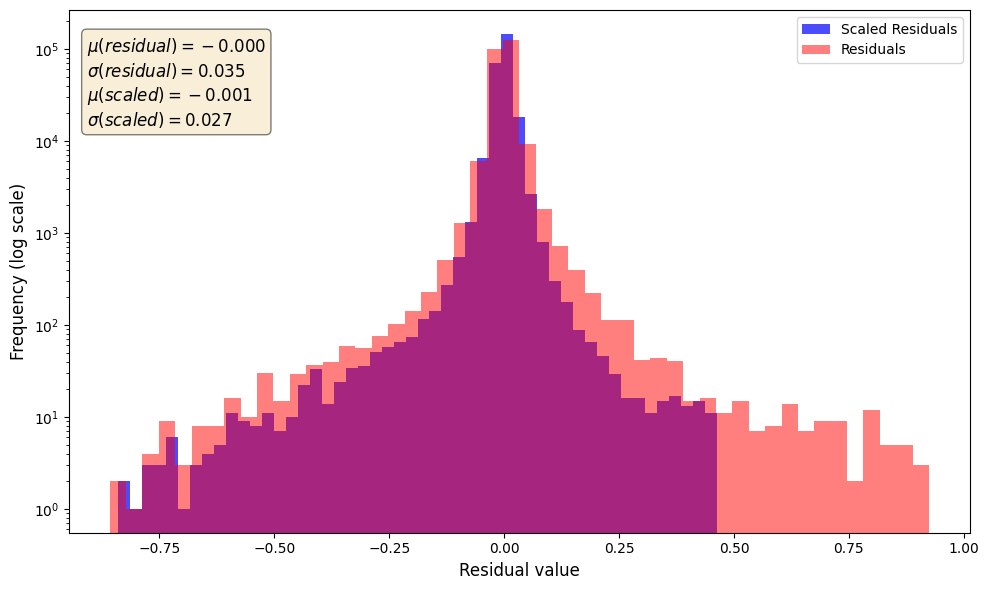

In [45]:
textstr = '\n'.join((
    r'$\mu(residual)=%.3f$' % (mean_residual, ),
    r'$\sigma(residual)=%.3f$' % (std_residual, ),
    r'$\mu(scaled)=%.3f$' % (mean_scaled_residuals, ),
    r'$\sigma(scaled)=%.3f$' % (std_scaled_residuals, ),
    ))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)


plt.figure(figsize=(10, 6))
plt.hist(scaled_residuals, bins=50, color='blue', alpha=0.7, label='Scaled Residuals')
plt.hist(residuals, bins=50, color='red', alpha=0.5, label='Residuals')
plt.text(0.02, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)
plt.xlabel('Residual value', fontsize=12)
plt.ylabel('Frequency (log scale)', fontsize=12)
plt.legend()
plt.yscale('log')
plt.tight_layout()
plt.show()

#### Estimated vs spectroscopic redshifts

In [ ]:
X_test_sample = X_test.sample(10000, random_state=42)
y_test_sample = y_test.sample(10000, random_state=42)
y_sample_pred = ada.predict(X_test_sample)

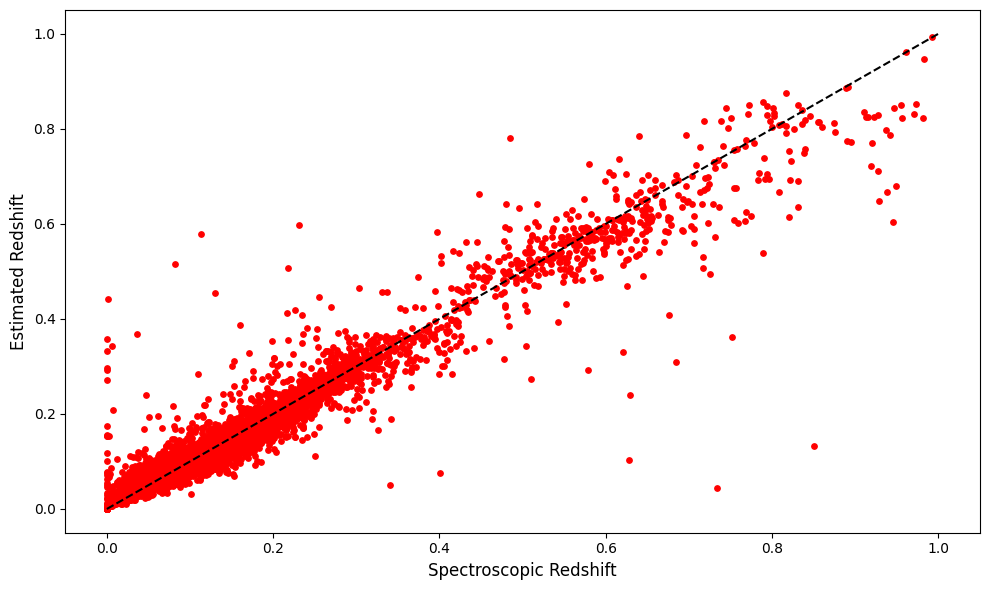

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_sample_pred, s=15, color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('Spectroscopic Redshift', fontsize=12)
plt.ylabel('Estimated Redshift', fontsize=12)
plt.tight_layout()
plt.show()